<AxesSubplot:>

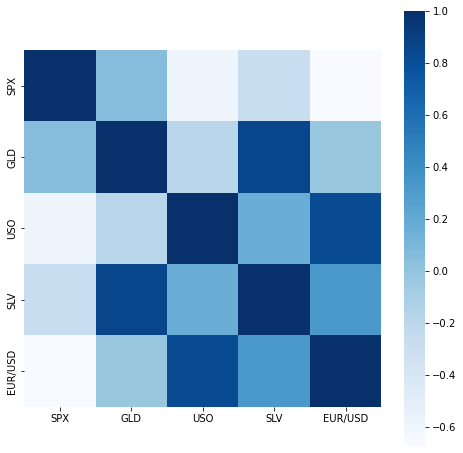

In [26]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul  7 18:36:42 2022

@author: Hossein.JvdZ
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# loading to a Pandas DataFrame
gold_data = pd.read_csv('dataset.csv')

#show 5 first rows
#gold_data.head()

#show 5 last rows
#gold_data.tail()

#missing values
#gold_data.isnull().sum()

# getting statistical measure of data
#gold_data.describe()

#Possitive or Negative Correlation
correlation = gold_data.corr()
# construct a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, cmap='Blues')

# Correlation of GLD
#print(correlation['GLD'])




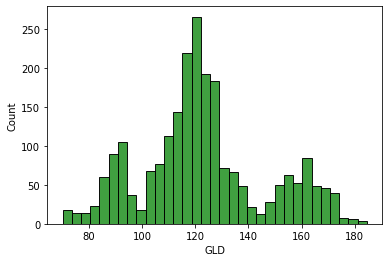

In [27]:

#check the distribution og gold price
sns.histplot(gold_data['GLD'], color='green')
#old implementation
# sns.distplot(gold_data['GLD'], color='green')


#splitting features and target
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']



In [28]:

#Splitting into Train and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

#implement to the random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100)

#training the model
regressor.fit(X_train, Y_train)

#prediction on test data
test_data_prediction = regressor.predict(X_test)

print(test_data_prediction)

[168.57779956  82.04259971 115.91149992 127.59410077 120.7693015
 154.67529753 150.54649817 126.1334004  117.45449894 125.99690072
 116.69180095 172.37090089 141.63789861 167.89399884 115.20710008
 117.53080034 138.90500274 169.98900073 159.34750272 158.76649908
 154.99510002 125.52730001 176.40019953 156.83140383 125.20960026
  94.13829992  77.04460016 120.57549987 119.18349965 167.51720004
  88.1686003  125.38529984  91.08960085 117.67820014 120.98879889
 136.29800055 115.35840118 115.0081011  148.24709992 107.24200102
 104.15350239  87.07449792 126.56270001 118.05739974 153.86029928
 119.50290053 108.41509965 108.00279822  93.2544004  126.97089817
  74.58750043 113.71939927 121.48130015 111.21169921 118.79149871
 120.56099952 159.72930015 168.23460101 146.94929701  85.96089839
  94.46700009  86.86839873  90.6834003  119.00970073 126.43720074
 127.64790002 170.25449976 122.27809971 117.40109877  98.78049992
 168.6590018  143.24229851 131.95830306 121.12110216 121.19099922
 119.693600

In [40]:

#R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R square error : ", error_score)

#Compare the actual values and predicted values in a plot
Y_test = list(Y_test)


R square error :  0.9883784085880787


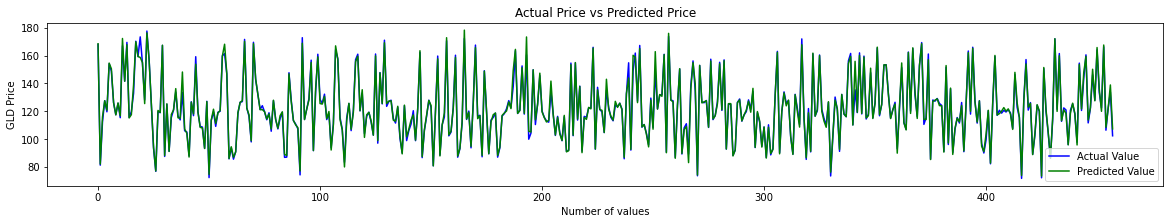

In [58]:

plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.rcParams["figure.figsize"] = (20,3)
plt.show()